# Algorithmes d'apprentissage par renforcement
## Script python Q-Learning associé au projet final

Nom: NAIDJI Ryan

In [146]:
import numpy as np
import random

# Définir les états et les actions
states = ['Workstation', 'P1', 'P2', 'P3']
actions = {
    'Workstation': ['Go to P1', 'Go to P2', 'Go to P3'],
    'P1': ['Go to Workstation', 'Go to P2', 'Go to P3'],
    'P2': ['Go to Workstation', 'Go to P1', 'Go to P3'],
    'P3': ['Go to Workstation', 'Go to P1', 'Go to P2']
}

# Définir le temps de trajet pour chaque action depuis chaque état
travel_times = {
    'Workstation': {'Go to P1': 2, 'Go to P2': 2, 'Go to P3': 11},
    'P1': {'Go to Workstation': 2, 'Go to P2': 3, 'Go to P3': 9},
    'P2': {'Go to Workstation': 2, 'Go to P1': 3, 'Go to P3': 9},
    'P3': {'Go to Workstation': 11, 'Go to P1': 9, 'Go to P2': 9}
}

# Initialiser les paramètres
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur de discount
initial_epsilon = 0.1  # Paramètre initial pour la politique ε-greedy
min_epsilon = 0.01  # Valeur minimale d'epsilon
epsilon_decay = 0.995  # Facteur de décroissance d'epsilon
num_episodes = 10000
max_steps_per_episode = 10

# Initialiser les Q-valeurs
Q = {}
for state in states:
    Q[state] = {}
    for action in actions[state]:
        Q[state][action] = 0.0

# Fonction pour choisir une action selon la politique ε-greedy
def choose_action(state, Q, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions[state])
    else:
        return max(Q[state], key=Q[state].get)

# Fonction pour mettre à jour les Q-valeurs
def update_Q(Q, state, action, reward, next_state, alpha, gamma):
    predict = Q[state][action]
    target = reward + gamma * max(Q[next_state].values())
    Q[state][action] += alpha * (target - predict)

# Algorithme Q-Learning
episode_rewards = []
episode_paths = []
episode_times = []
episode_steps = []  # Nouvelle liste pour enregistrer le nombre d'étapes

epsilon = initial_epsilon

for episode in range(num_episodes):
    state = 'Workstation'
    visited_states = set()
    total_reward = 0
    path = [state]
    total_time = 0
    steps = 0  # Compteur d'étapes pour chaque épisode
    
    while steps < max_steps_per_episode:
        action = choose_action(state, Q, epsilon)
        next_state = action.split(' ')[-1]
        time = travel_times[state][action]
        reward = -1 * time  # Malus proportionnel au temps de trajet
        
        # Récompense ou malus selon si l'état a déjà été visité
        if next_state in visited_states:
            reward -= 100  # Malus significatif
        else:
            reward += 100  # Récompense significative
        
        visited_states.add(next_state)
        
        # Mettre à jour les Q-valeurs
        update_Q(Q, state, action, reward, next_state, alpha, gamma)
        
        state = next_state
        path.append(state)
        total_reward += reward
        total_time += time
        steps += 1  # Incrémenter le compteur d'étapes
        
        # Terminer l'épisode si l'agent retourne à la Workstation après avoir visité tous les états
        if state == 'Workstation' and len(visited_states) == len(states):
            reward += 200  # Récompense très significative pour finir à la Workstation après avoir visité tous les états
            total_reward += reward
            break
    
    episode_rewards.append(total_reward)
    episode_paths.append(path)
    episode_times.append(total_time)
    episode_steps.append(steps)  # Enregistrer le nombre d'étapes pour cet épisode

    # Réduire epsilon
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay
    
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Total Time: {total_time}")
        print(f"Chemin utilisé: {path}")

# Imprimer les Q-valeurs finales
for state in Q:
    print(f"Q-values for {state}: {Q[state]}")

# Déterminer et imprimer la politique finale
policy = {}
for state in states:
    best_action = max(Q[state], key=Q[state].get)
    policy[state] = best_action

print("\nFinal Policy:")
for state in policy:
    print(f"In state {state}, take action {policy[state]}")

# Calculer le temps de trajet selon la politique finale
def calculate_travel_time(policy, travel_times):
    state = 'Workstation'
    visited_states = set()
    total_time = 0
    path = [state]
    
    while len(visited_states) < len(states):
        action = policy[state]
        next_state = action.split(' ')[-1]
        time = travel_times[state][action]
        
        total_time += time
        visited_states.add(next_state)
        
        state = next_state
        path.append(state)
        
        if state == 'Workstation' and len(visited_states) == len(states):
            break
    
    return total_time, path

total_time, path = calculate_travel_time(policy, travel_times)

print(f"\nTemps de trajet total selon la politique finale : {total_time} minutes")
print(f"Chemin suivi selon la politique finale : {path}")

# Afficher les statistiques des étapes
print(f"Nombre d'étapes minimum : {min(episode_steps)}")
print(f"Nombre d'étapes maximum : {max(episode_steps)}")
print(f"Nombre d'étapes moyen : {np.mean(episode_steps)}")


Episode: 100, Total Reward: 664, Total Time: 25
Chemin utilisé: ['Workstation', 'P2', 'P1', 'P3', 'Workstation']
Episode: 200, Total Reward: 664, Total Time: 25
Chemin utilisé: ['Workstation', 'P2', 'P1', 'P3', 'Workstation']
Episode: 300, Total Reward: 664, Total Time: 25
Chemin utilisé: ['Workstation', 'P2', 'P1', 'P3', 'Workstation']
Episode: 400, Total Reward: 664, Total Time: 25
Chemin utilisé: ['Workstation', 'P2', 'P1', 'P3', 'Workstation']
Episode: 500, Total Reward: 664, Total Time: 25
Chemin utilisé: ['Workstation', 'P2', 'P1', 'P3', 'Workstation']
Episode: 600, Total Reward: 664, Total Time: 25
Chemin utilisé: ['Workstation', 'P2', 'P1', 'P3', 'Workstation']
Episode: 700, Total Reward: 664, Total Time: 25
Chemin utilisé: ['Workstation', 'P2', 'P1', 'P3', 'Workstation']
Episode: 800, Total Reward: 664, Total Time: 25
Chemin utilisé: ['Workstation', 'P2', 'P1', 'P3', 'Workstation']
Episode: 900, Total Reward: 664, Total Time: 25
Chemin utilisé: ['Workstation', 'P2', 'P1', 'P3'

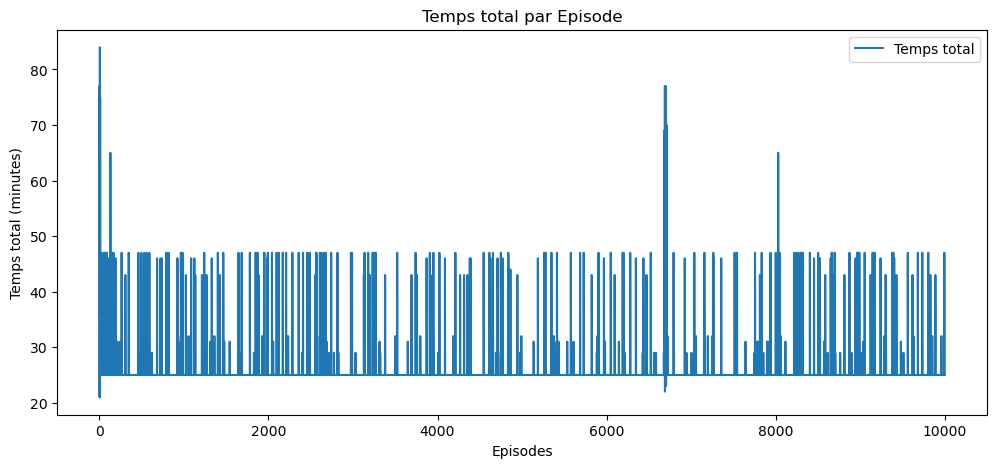

In [147]:
import matplotlib.pyplot as plt

# Tracer le temps de déplacement total par épisode
plt.figure(figsize=(12, 5))
plt.plot(range(num_episodes), episode_times, label='Temps total')
plt.xlabel('Episodes')
plt.ylabel('Temps total (minutes)')
plt.title('Temps total par Episode')
plt.legend()
plt.show()

